Alvaro David Montero Barraza
Tecnologías de Lenguaje Natural
5BV1
Ingeniería en Inteligencia Artificial

Este programa realiza un análisis exploratorio a un texto, posteriormente se aplican tecnicas de normalización al texto
Y un análisis exploratorio al resultado normalizado

Análisis Exploratorio de texto

Tokens

In [24]:
#Importacion de librerias
import spacy
from collections import Counter

spanish_text=0
with open("spanish.txt","r",encoding="utf-8") as f:
    spanish_text=f.read()
#print(spanish_text)
nlp=spacy.load('es_core_news_sm')
doc=nlp(spanish_text)#Ya nos da el lemma y el postagging

tokens=[token.text for token in doc]
print(tokens)
print("\nNumero total de tokens en el texto: "+str(len(tokens)))


['Por', 'lo', 'general', ',', 'no', 'pensamos', 'en', 'las', 'complejidades', 'de', 'nuestros', 'propios', 'lenguajes', '.', 'Es', 'un', '\n', 'comportamiento', 'intuitivo', 'que', 'se', 'utiliza', 'para', 'transmitir', 'información', 'y', 'significados', 'con', 'señales', '\n', 'semánticas', ',', 'como', 'palabras', ',', 'signos', 'o', 'imágenes', '.', 'Se', 'dice', 'que', 'es', 'más', 'fácil', 'aprender', 'un', 'idioma', '\n', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'se', 'trata', 'de', 'un', 'comportamiento', 'repetible', 'y', 'entrenado', ',', '\n', 'casi', 'como', 'caminar', '.', 'Asimismo', ',', 'el', 'idioma', 'no', 'sigue', 'un', 'conjunto', 'de', 'reglas', 'estricto', ',', 'ya', 'que', 'las', '\n', 'excepciones', 'son', 'innumerables', ',', 'por', 'ejemplo', ':', 'los', 'sustantivos', 'que', 'terminan', 'con', '‘', 'a', '’', 'son', 'femeninos', ',', '\n', 'pero', 'no', 'es', 'el', 'caso', 'del', 'sustantivo', '‘', 'el', 'problema', '‘', '.', 'Sin', 'embargo', ','

Tokens únicos

In [25]:
tokens_freq=Counter(tokens) #Contador de frecuencia de tokens

unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]

print(unique_tokens)

print("\nNumero de tokens unicos "+str(len(unique_tokens)))



['Por', 'general', 'pensamos', 'complejidades', 'nuestros', 'propios', 'lenguajes', 'intuitivo', 'utiliza', 'transmitir', 'información', 'significados', 'señales', 'semánticas', 'palabras', 'signos', 'imágenes', 'Se', 'dice', 'fácil', 'aprender', 'nuevo', 'cuando', 'somos', 'adolescentes', 'porque', 'repetible', 'entrenado', 'casi', 'caminar', 'Asimismo', 'sigue', 'conjunto', 'estricto', 'excepciones', 'innumerables', 'ejemplo', ':', 'sustantivos', 'terminan', '’', 'femeninos', 'caso', 'sustantivo', 'problema', 'Sin', 'embargo', 'nos', 'resulta', 'extremadamente', 'difícil', 'computadoras', 'tienen', 'lidiar', 'gran', 'cantidad', 'datos', 'estructurados', 'ausencia', 'formales', 'falta', 'contexto', 'intención', 'real', 'eso', 'aprendizaje', 'automático', 'inteligencia', 'artificial', 'ganan', 'fuerza', 'llaman', 'atención', 'puesto', 'dependen', 'cada', 'vez', 'sistemas', 'informáticos', 'comunicarse', 'realizar', 'tareas', 'A', 'medida', 'vuelve', 'sofisticada', 'también', 'procesami

Histograma de los 15 tokens mas comunes

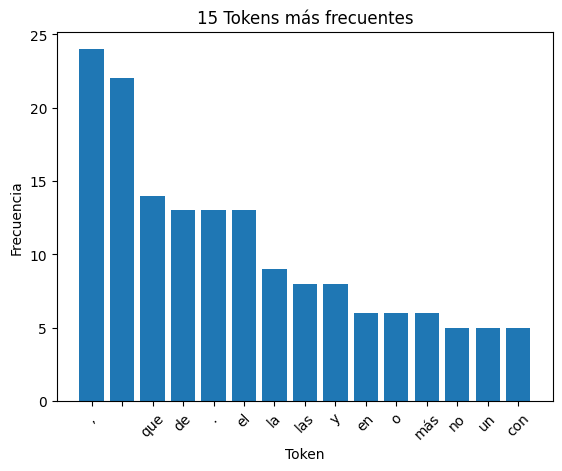

In [3]:
import matplotlib.pyplot as plt
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()


Histograma de los 15 tokens menos comunes

Hay 148 tokens que comparten esa característica


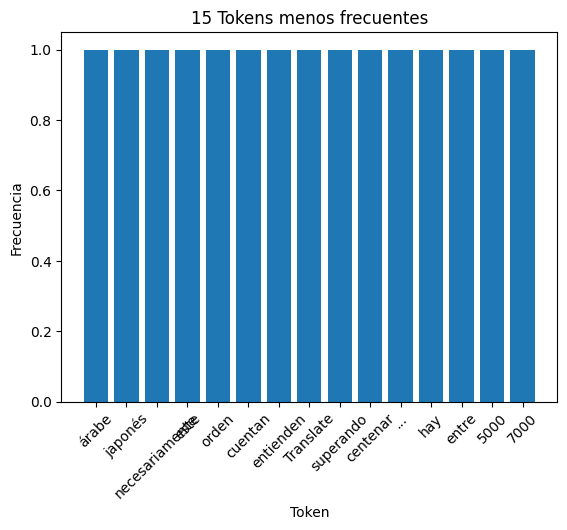

In [4]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()



Normalización de texto

Se quitan stopwords y se hace lemmatizado y stemming

In [23]:
#
from nltk.stem import SnowballStemmer
 
tokens_stopless=[token for token in doc if not token.is_stop]#Remoción de stopwords
stemmer=SnowballStemmer("spanish")

stems=[stemmer.stem(token.lemma_) for token in tokens_stopless]#Stemming nltk
pos_test=[(token.lemma_,token.pos_) for token in tokens_stopless]#Lemmas y postagging
print("Stemming")
print(stems)

lemmas_pos=[(token.lemma_,token.pos_) for token in nlp(" ".join(stems))]#Haciendo postagging a los lemmas stemmizados
print("\nLemmas y postagging con spacy y nltk con stemming")
print(lemmas_pos)
print("\nLemmas y postagging con solo nltk")
print(pos_test)
print("\nStemming a proceso de nltk ")
stem_ntlk=[(stemmer.stem(token[0]),token[1]) for token in pos_test]
print(stem_ntlk)

Stemming
['general', ',', 'pens', 'complej', 'lenguaj', '.', '\n', 'comport', 'intuit', 'utiliz', 'transmit', 'inform', 'signific', 'señal', '\n', 'semant', ',', 'palabr', ',', 'sign', 'imag', '.', 'facil', 'aprend', 'idiom', '\n', 'adolescent', 'comport', 'repet', 'entren', ',', '\n', 'camin', '.', 'asim', ',', 'idiom', 'conjunt', 'regl', 'estrict', ',', '\n', 'excepcion', 'innumer', ',', 'ejempl', ':', 'sustant', 'termin', '‘', '’', 'femenin', ',', '\n', 'cas', 'sustant', '‘', 'problem', '‘', '.', ',', 'human', 'result', 'natural', '\n', 'extrem', 'dificil', 'comput', ',', 'lidi', 'cantid', '\n', 'dat', 'estructur', ',', 'ausenci', 'regl', 'formal', 'falt', 'context', 'intencion', '\n', 'real', '.', 'aprendizaj', 'automat', 'inteligent', 'artificial', '(', 'ia', ')', 'gan', 'fuerz', 'llam', '\n', 'atencion', ',', 'puest', 'human', 'depend', 'sistem', 'informat', '\n', 'comunicar el', 'tare', '.', 'med', 'ia', 'volv', 'sofistic', ',', '\n', 'proces', 'lenguaj', 'natural', '(', 'pln', 

Hacemos ese orden para revisar que tan preciso fue hacerlo de una u otra manera, en este caso haciendo lemmatizacion
postagging y al final stemming nos dió un mejor resultado ya que se conserva el sentido de la palabra

In [40]:
#Pasar texto a minusculas
lower_text=[]
lower_text=[(token[0],token[1]) for token in stem_ntlk ]
print(lower_text)
print(len(lower_text))



[('general', 'NOUN'), (',', 'PUNCT'), ('pens', 'VERB'), ('complej', 'NOUN'), ('lenguaj', 'NOUN'), ('.', 'PUNCT'), ('\n', 'SPACE'), ('comport', 'NOUN'), ('intuit', 'ADJ'), ('utiliz', 'VERB'), ('transmit', 'VERB'), ('inform', 'NOUN'), ('signific', 'VERB'), ('señal', 'NOUN'), ('\n', 'SPACE'), ('semant', 'ADJ'), (',', 'PUNCT'), ('palabr', 'NOUN'), (',', 'PUNCT'), ('sign', 'NOUN'), ('imag', 'NOUN'), ('.', 'PUNCT'), ('facil', 'ADJ'), ('aprend', 'VERB'), ('idiom', 'NOUN'), ('\n', 'SPACE'), ('adolescent', 'ADJ'), ('comport', 'NOUN'), ('repet', 'ADJ'), ('entren', 'ADJ'), (',', 'PUNCT'), ('\n', 'SPACE'), ('camin', 'VERB'), ('.', 'PUNCT'), ('asim', 'ADV'), (',', 'PUNCT'), ('idiom', 'NOUN'), ('conjunt', 'NOUN'), ('regl', 'NOUN'), ('estrict', 'ADJ'), (',', 'PUNCT'), ('\n', 'SPACE'), ('excepcion', 'NOUN'), ('innumer', 'ADJ'), (',', 'PUNCT'), ('ejempl', 'NOUN'), (':', 'PUNCT'), ('sustant', 'NOUN'), ('termin', 'VERB'), ('‘', 'PROPN'), ('’', 'PROPN'), ('femenin', 'ADJ'), (',', 'PUNCT'), ('\n', 'SPACE')

In [47]:
#Quitar puntuaciones
clean_text=[(token[0],token[1])for token in lower_text if token[1] != 'PUNCT']
print(clean_text)
print(len(clean_text))

48
[('general', 'NOUN'), ('pens', 'VERB'), ('complej', 'NOUN'), ('lenguaj', 'NOUN'), ('\n', 'SPACE'), ('comport', 'NOUN'), ('intuit', 'ADJ'), ('utiliz', 'VERB'), ('transmit', 'VERB'), ('inform', 'NOUN'), ('signific', 'VERB'), ('señal', 'NOUN'), ('\n', 'SPACE'), ('semant', 'ADJ'), ('palabr', 'NOUN'), ('sign', 'NOUN'), ('imag', 'NOUN'), ('facil', 'ADJ'), ('aprend', 'VERB'), ('idiom', 'NOUN'), ('\n', 'SPACE'), ('adolescent', 'ADJ'), ('comport', 'NOUN'), ('repet', 'ADJ'), ('entren', 'ADJ'), ('\n', 'SPACE'), ('camin', 'VERB'), ('asim', 'ADV'), ('idiom', 'NOUN'), ('conjunt', 'NOUN'), ('regl', 'NOUN'), ('estrict', 'ADJ'), ('\n', 'SPACE'), ('excepcion', 'NOUN'), ('innumer', 'ADJ'), ('ejempl', 'NOUN'), ('sustant', 'NOUN'), ('termin', 'VERB'), ('‘', 'PROPN'), ('’', 'PROPN'), ('femenin', 'ADJ'), ('\n', 'SPACE'), ('cas', 'NOUN'), ('sustant', 'PROPN'), ('‘', 'PROPN'), ('problem', 'NOUN'), ('‘', 'PROPN'), ('human', 'NOUN'), ('result', 'VERB'), ('natural', 'ADJ'), ('\n', 'SPACE'), ('extrem', 'ADV'), 

SEGUNDO ANÁLISIS EXPLORATORIO

In [42]:
print("Numero de tokens "+str(len(clean_text)))

Numero de tokens 167


In [51]:
#Tokens unicos
tokens_freq=Counter(elem[0] for elem in clean_text)
unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]
print("Numero de tokens unicos "+str(len(unique_tokens)))
print(unique_tokens)

Numero de tokens unicos 92
['general', 'complej', 'intuit', 'transmit', 'inform', 'signific', 'señal', 'semant', 'palabr', 'sign', 'imag', 'facil', 'aprend', 'adolescent', 'repet', 'entren', 'camin', 'asim', 'conjunt', 'estrict', 'excepcion', 'innumer', 'ejempl', 'termin', '’', 'femenin', 'cas', 'problem', 'result', 'extrem', 'dificil', 'comput', 'lidi', 'cantid', 'dat', 'estructur', 'ausenci', 'formal', 'falt', 'context', 'intencion', 'real', 'aprendizaj', 'automat', 'gan', 'fuerz', 'llam', 'atencion', 'puest', 'depend', 'sistem', 'informat', 'comunicar el', 'tare', 'med', 'volv', 'sofistic', 'pln', 'camp', 'conoc', 'ocup', 'investig', 'comunic', 'maquin', 'person', 'virtual', 'trat', 'logic', 'limit', 'interes', 'econom', 'practic', 'habl', 'digital', 'ten', 'siri', '20', 'assistant', '8)', 'aleman', 'frances', 'portugues', 'arab', 'japones', 'necesari', 'cont', 'entend', 'translat', 'super', 'centen', '5000', '7000']


Histogramas de los 15 tokens mas y menos frecuentes

[('\n', 22)]


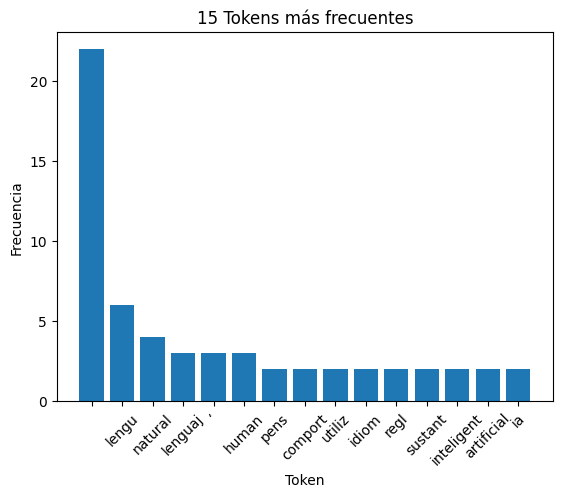

In [53]:
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]
plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()

Hay 92 tokens que comparten esa característica


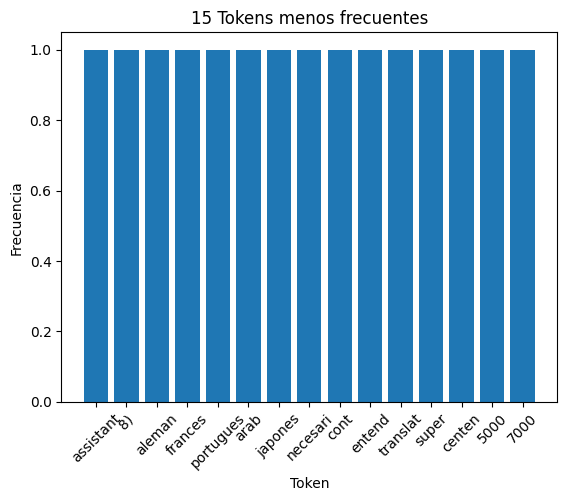

In [54]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()

